In [21]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [22]:
# Step 1: Reading the data
data = pd.read_csv('extended_activities.csv')

# Step 2: Describe the data
print(data.head())  # Display the first few rows
print(data.info())   # Display data types and missing values
print(data.describe())  # Display summary statistics

   Activity ID          Activity Date Activity Name Activity Type  \
0   2929442069  13 Dec 2019, 01:46:07    Lunch Ride          Ride   
1   2945780637  20 Dec 2019, 23:05:01  Morning Ride          Ride   
2   2948028275  21 Dec 2019, 23:25:29  Morning Ride          Ride   
3   2952462113  24 Dec 2019, 01:19:17    Lunch Ride          Ride   
4   2956494096  26 Dec 2019, 00:09:08    Lunch Ride          Ride   

   Elapsed Time  Distance  Max Heart Rate  Relative Effort  Commute  \
0          3859     22.97           139.0             11.0    False   
1          4852     29.65           133.0             12.0    False   
2          5817     32.38           139.0             19.0    False   
3          3851     21.68           140.0             11.0    False   
4          5843     32.36           131.0             14.0    False   

  Activity Gear  ... Maximum Power 10s  Maximum Power 30s  \
0           NaN  ...             412.9              342.1   
1           NaN  ...             342

In [23]:
# Dropping unnecessary columns
columns_to_drop = ['Filename', 'Activity Gear']  
data.drop(columns=columns_to_drop, inplace=True)

In [24]:
# Step 3: Data Cleaning
# Checking for missing values
print(data.isnull().sum())

Activity ID                    0
Activity Date                  0
Activity Name                  0
Activity Type                  0
Elapsed Time                   0
Distance                       0
Max Heart Rate                 0
Relative Effort                0
Commute                        0
Athlete Weight               275
Bike Weight                  183
Moving Time                    0
Max Speed                      0
Average Speed                  0
Elevation Gain                 1
Elevation Loss                 7
Elevation Low                  7
Elevation High                 7
Max Grade                      0
Average Grade                  0
Max Cadence                    0
Average Cadence                0
Average Heart Rate             0
Average Watts                  0
Calories                       0
Average Temperature          161
Total Work                   148
Perceived Exertion           344
Weighted Average Power         0
Power Count                    0
Prefer Per

In [25]:
# Filling missing values with mean for numeric columns
numeric_columns = ['Elapsed Time', 'Max Heart Rate', 'Athlete Weight', 
                   'Bike Weight', 'Moving Time', 'Max Speed', 'Average Speed','Elevation Gain', 
                   'Elevation Loss', 'Elevation Low', 'Elevation High',
                   'Average Cadence', 'Average Heart Rate','Average Watts','Calories', 
                   'Average Temperature', 'Total Work', 'Perceived Exertion', 'Weighted Average Power', 
                   'Power Count', 'Prefer Perceived Exertion','Perceived Relative Effort', 
                   'Grade Adjusted Distance', 'Average Elapsed Speed','Dirt Distance', 
                   'Total Steps', 'Maximum Power 5s','Maximum Power 10s','Maximum Power 30s',
                   'Maximum Power 1.0min','Maximum Power 5.0min','Maximum Power 10.0min',
                   'Maximum Power 20.0min', 'Maximum Power 30.0min', 'Maximum Power 1.0 hr',
                   'Maximum Power 1.5 hr','Maximum Power 2.0 hr']
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

    
# Drop rows with missing values in specified non-numeric columns
non_numeric_columns = ['Activity ID', 'Activity Date','Activity Name','Activity Type']
data.dropna(subset=non_numeric_columns, inplace=True)

In [26]:
# Checking for missing values
print(data.isnull().sum())

Activity ID                  0
Activity Date                0
Activity Name                0
Activity Type                0
Elapsed Time                 0
Distance                     0
Max Heart Rate               0
Relative Effort              0
Commute                      0
Athlete Weight               0
Bike Weight                  0
Moving Time                  0
Max Speed                    0
Average Speed                0
Elevation Gain               0
Elevation Loss               0
Elevation Low                0
Elevation High               0
Max Grade                    0
Average Grade                0
Max Cadence                  0
Average Cadence              0
Average Heart Rate           0
Average Watts                0
Calories                     0
Average Temperature          0
Total Work                   0
Perceived Exertion           0
Weighted Average Power       0
Power Count                  0
Prefer Perceived Exertion    0
Perceived Relative Effort    0
Grade Ad

In [27]:
print(data.head(10)) 

   Activity ID          Activity Date   Activity Name Activity Type  \
0   2929442069  13 Dec 2019, 01:46:07      Lunch Ride          Ride   
1   2945780637  20 Dec 2019, 23:05:01    Morning Ride          Ride   
2   2948028275  21 Dec 2019, 23:25:29    Morning Ride          Ride   
3   2952462113  24 Dec 2019, 01:19:17      Lunch Ride          Ride   
4   2956494096  26 Dec 2019, 00:09:08      Lunch Ride          Ride   
5   2961293151  27 Dec 2019, 23:38:08    Morning Ride          Ride   
6   2969244332  31 Dec 2019, 01:48:12      Lunch Ride          Ride   
7   2974544942   2 Jan 2020, 03:43:00  Afternoon Ride          Ride   
8   2979711652   3 Jan 2020, 23:27:55    Morning Ride          Ride   
9   2982905280   5 Jan 2020, 01:30:44      Lunch Ride          Ride   

   Elapsed Time  Distance  Max Heart Rate  Relative Effort  Commute  \
0          3859     22.97           139.0             11.0    False   
1          4852     29.65           133.0             12.0    False   
2    

In [28]:
# Filtering Data for specified activity types
filtered_data = data[data['Activity Type'] == 'Run'].copy()

In [29]:
print(filtered_data.head()) 

    Activity ID          Activity Date Activity Name Activity Type  \
89   7057073739  28 Apr 2022, 21:49:44   Morning Run           Run   
90   7067754767   1 May 2022, 00:11:03   Morning Run           Run   
91   7073448977   1 May 2022, 23:04:26   Morning Run           Run   
92   7083686840   3 May 2022, 20:34:15   Morning Run           Run   
93   7094718079   5 May 2022, 21:44:27   Morning Run           Run   

    Elapsed Time  Distance  Max Heart Rate  Relative Effort  Commute  \
89          4127     12.77           178.0             78.0    False   
90          7723     24.63           173.0            185.0    False   
91          4202     12.51           182.0            255.0    False   
92          4086     12.72           188.0            276.0    False   
93          4290     13.09           184.0            241.0    False   

    Athlete Weight  ...  Maximum Power 10s  Maximum Power 30s  \
89       80.228571  ...              296.8              271.9   
90       80.2285

In [30]:
# Checking for missing values
print(filtered_data.isnull().sum())

Activity ID                  0
Activity Date                0
Activity Name                0
Activity Type                0
Elapsed Time                 0
Distance                     0
Max Heart Rate               0
Relative Effort              0
Commute                      0
Athlete Weight               0
Bike Weight                  0
Moving Time                  0
Max Speed                    0
Average Speed                0
Elevation Gain               0
Elevation Loss               0
Elevation Low                0
Elevation High               0
Max Grade                    0
Average Grade                0
Max Cadence                  0
Average Cadence              0
Average Heart Rate           0
Average Watts                0
Calories                     0
Average Temperature          0
Total Work                   0
Perceived Exertion           0
Weighted Average Power       0
Power Count                  0
Prefer Perceived Exertion    0
Perceived Relative Effort    0
Grade Ad

In [31]:
# Checking unique values in 'Activity Type' column to see if 'Run' is present
print(filtered_data['Activity Type'].unique())

['Run']


### Identifying Feature importance for our prediction using Distance as our target variable


Feature Importance:
                      Feature  Importance
4                 Moving Time    0.385282
14                   Calories    0.352591
19                Power Count    0.111974
0                Elapsed Time    0.067509
35       Maximum Power 2.0 hr    0.042883
33       Maximum Power 1.0 hr    0.018148
34       Maximum Power 1.5 hr    0.013068
23              Dirt Distance    0.000658
8              Elevation Loss    0.000632
10             Elevation High    0.000617
1              Max Heart Rate    0.000584
11            Average Cadence    0.000567
7              Elevation Gain    0.000564
26          Maximum Power 10s    0.000523
5                   Max Speed    0.000449
25           Maximum Power 5s    0.000442
12         Average Heart Rate    0.000407
28       Maximum Power 1.0min    0.000396
32      Maximum Power 30.0min    0.000356
22      Average Elapsed Speed    0.000308
13              Average Watts    0.000293
6               Average Speed    0.000281
29       Maxi

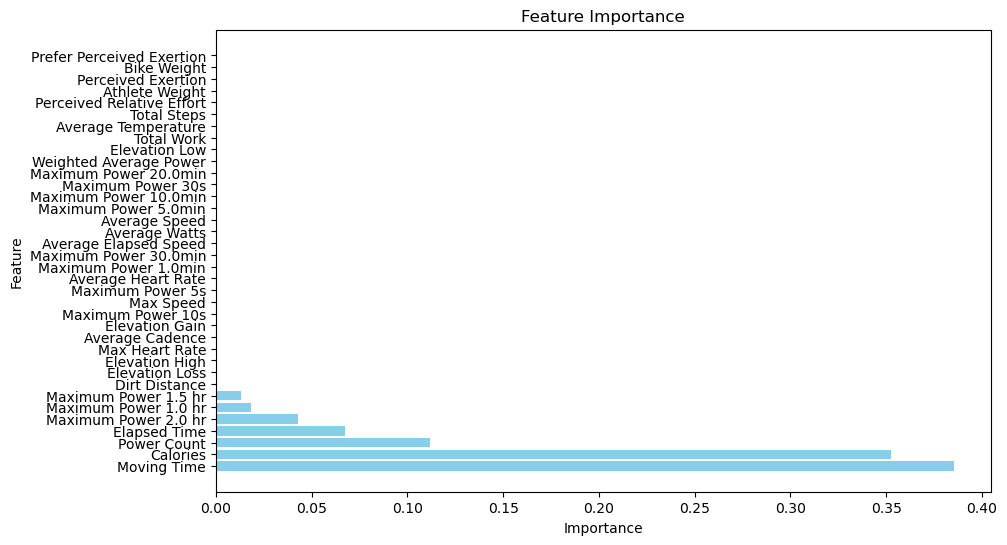

"Overall, the RandomForestRegressor model demonstrates strong performance in predicting 'Distance', with a high R-squared score and low MSE. The most important features for predicting 'Distance' are 'Moving Time','Calories', and 'Power Count' indicating that the duration of the activity and the calories burned play significant roles in determining the distance covered."

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt

# Define features (X) and target variable (y)
X = filtered_data[['Elapsed Time', 'Max Heart Rate', 'Athlete Weight', 
                   'Bike Weight', 'Moving Time', 'Max Speed', 'Average Speed','Elevation Gain', 
                   'Elevation Loss', 'Elevation Low', 'Elevation High',
                   'Average Cadence', 'Average Heart Rate','Average Watts','Calories', 
                   'Average Temperature', 'Total Work', 'Perceived Exertion', 'Weighted Average Power', 
                   'Power Count', 'Prefer Perceived Exertion','Perceived Relative Effort', 
                   'Average Elapsed Speed','Dirt Distance', 
                   'Total Steps', 'Maximum Power 5s','Maximum Power 10s','Maximum Power 30s',
                   'Maximum Power 1.0min','Maximum Power 5.0min','Maximum Power 10.0min',
                   'Maximum Power 20.0min', 'Maximum Power 30.0min', 'Maximum Power 1.0 hr',
                   'Maximum Power 1.5 hr','Maximum Power 2.0 hr']]
y = filtered_data['Distance']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Feature Importance
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
print("\nFeature Importance:")
print(feature_importances)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

'''Overall, the RandomForestRegressor model demonstrates strong performance in predicting 'Distance', with a high R-squared score and low MSE. The most important features for predicting 'Distance' are 'Moving Time','Calories', and 'Power Count' indicating that the duration of the activity and the calories burned play significant roles in determining the distance covered.'''

### Identifying Feature importance for our prediction using Average Speed as our target variable


Feature Importance:
                      Feature  Importance
21      Average Elapsed Speed    0.312417
12              Average Watts    0.259201
31      Maximum Power 30.0min    0.171597
30      Maximum Power 20.0min    0.069344
17     Weighted Average Power    0.052726
28       Maximum Power 5.0min    0.024327
10            Average Cadence    0.014460
26          Maximum Power 30s    0.013858
24           Maximum Power 5s    0.010175
22              Dirt Distance    0.006505
8               Elevation Low    0.006377
32       Maximum Power 1.0 hr    0.006079
6              Elevation Gain    0.005994
7              Elevation Loss    0.005399
11         Average Heart Rate    0.004541
29      Maximum Power 10.0min    0.004370
25          Maximum Power 10s    0.004263
14        Average Temperature    0.004210
27       Maximum Power 1.0min    0.003552
1              Max Heart Rate    0.003194
9              Elevation High    0.003105
5                   Max Speed    0.003032
13           

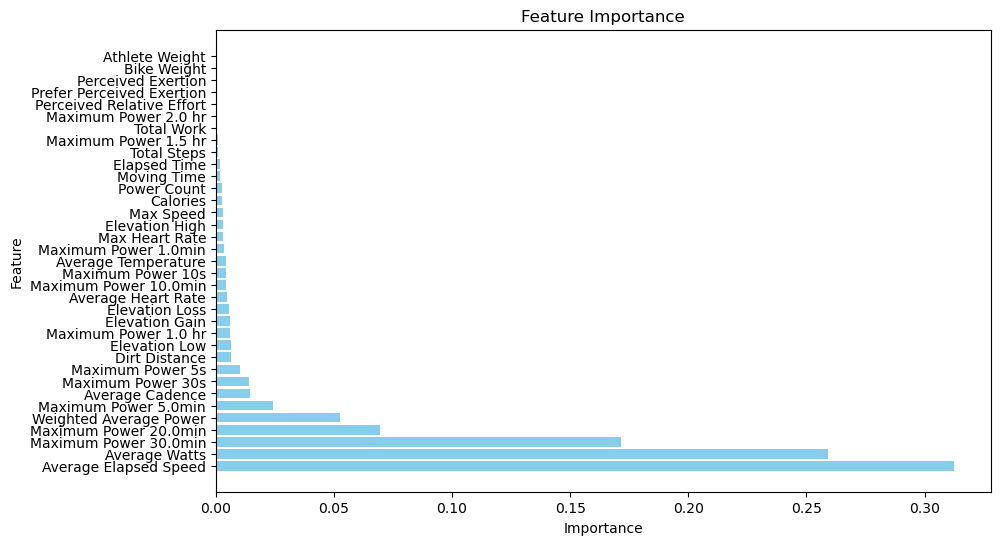

In [33]:
# Defining features (X) and target variable (y)
X = filtered_data[['Elapsed Time', 'Max Heart Rate', 'Athlete Weight', 
                   'Bike Weight', 'Moving Time', 'Max Speed','Elevation Gain', 
                   'Elevation Loss', 'Elevation Low', 'Elevation High',
                   'Average Cadence', 'Average Heart Rate','Average Watts','Calories', 
                   'Average Temperature', 'Total Work', 'Perceived Exertion', 'Weighted Average Power', 
                   'Power Count', 'Prefer Perceived Exertion','Perceived Relative Effort', 
                   'Average Elapsed Speed','Dirt Distance', 
                   'Total Steps', 'Maximum Power 5s','Maximum Power 10s','Maximum Power 30s',
                   'Maximum Power 1.0min','Maximum Power 5.0min','Maximum Power 10.0min',
                   'Maximum Power 20.0min', 'Maximum Power 30.0min', 'Maximum Power 1.0 hr',
                   'Maximum Power 1.5 hr','Maximum Power 2.0 hr']]
y = filtered_data['Average Speed']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and fitting RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Feature Importance
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
print("\nFeature Importance:")
print(feature_importances)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

### Identifying Feature importance for our prediction using 'Power Count' as our target variable


Feature Importance:
                      Feature  Importance
0                Elapsed Time    0.459310
4                 Moving Time    0.336369
32       Maximum Power 1.5 hr    0.100022
13                   Calories    0.058915
33       Maximum Power 2.0 hr    0.034695
31       Maximum Power 1.0 hr    0.003323
9              Elevation High    0.000806
21              Dirt Distance    0.000659
1              Max Heart Rate    0.000590
5                   Max Speed    0.000587
29      Maximum Power 20.0min    0.000561
7              Elevation Loss    0.000489
6              Elevation Gain    0.000439
11         Average Heart Rate    0.000432
28      Maximum Power 10.0min    0.000395
10            Average Cadence    0.000377
20      Average Elapsed Speed    0.000316
24          Maximum Power 10s    0.000314
23           Maximum Power 5s    0.000265
27       Maximum Power 5.0min    0.000221
25          Maximum Power 30s    0.000194
8               Elevation Low    0.000167
30      Maxim

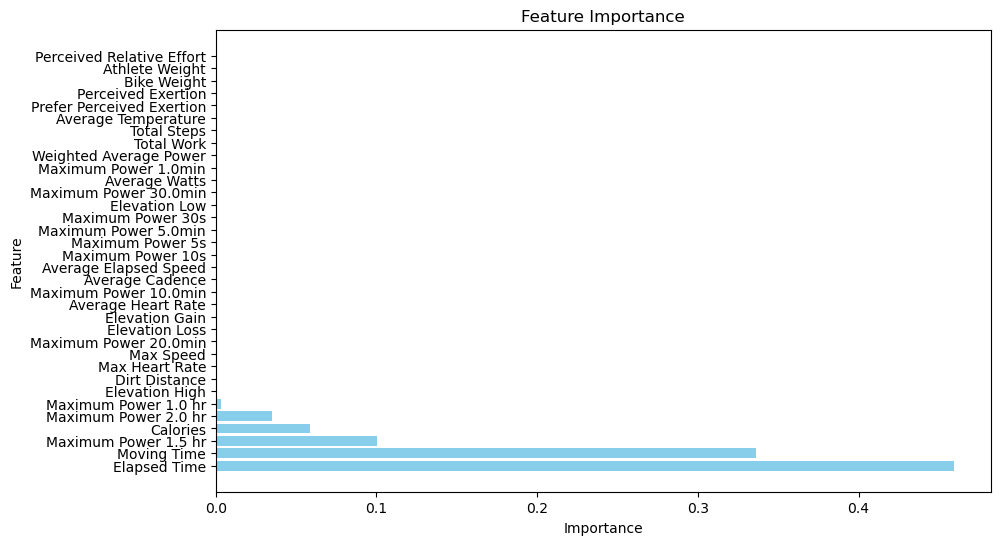

In [34]:
# Defining features (X) and target variable (y)
X = filtered_data[['Elapsed Time', 'Max Heart Rate', 'Athlete Weight', 
                   'Bike Weight', 'Moving Time', 'Max Speed','Elevation Gain', 
                   'Elevation Loss', 'Elevation Low', 'Elevation High',
                   'Average Cadence', 'Average Heart Rate','Average Watts','Calories', 
                   'Average Temperature','Total Work', 'Perceived Exertion', 'Weighted Average Power', 
                   'Prefer Perceived Exertion','Perceived Relative Effort', 
                   'Average Elapsed Speed','Dirt Distance', 
                   'Total Steps', 'Maximum Power 5s','Maximum Power 10s','Maximum Power 30s',
                   'Maximum Power 1.0min','Maximum Power 5.0min','Maximum Power 10.0min',
                   'Maximum Power 20.0min', 'Maximum Power 30.0min', 'Maximum Power 1.0 hr',
                   'Maximum Power 1.5 hr','Maximum Power 2.0 hr']]
y = filtered_data['Power Count']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and fitting RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Feature Importance
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
print("\nFeature Importance:")
print(feature_importances)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

### 1. Predictive model using Linear Regression

Mean Squared Error: 0.8131992606394152
R-squared Score: 0.9714857159128762


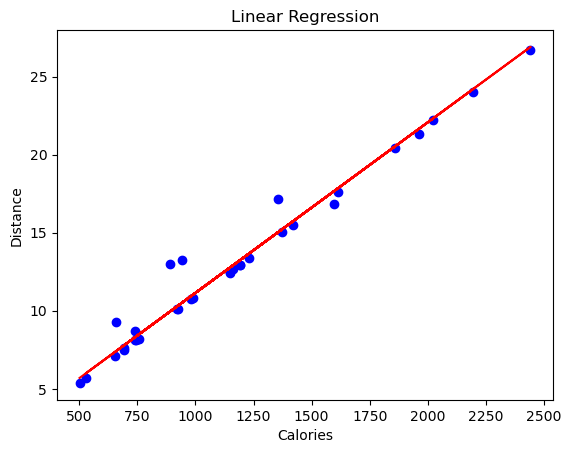

"Overall, these results suggest that the linear regression model using 'Calories' as a predictor \nfor 'Distance' explains most of the variability in the data "

In [35]:
# Performing a linear regression on 'Distance' using 'Calories' as predictor
# Split data into features (X) and target variable (y)
X = filtered_data[['Calories']]
y = filtered_data['Distance']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a linear regression model
model = LinearRegression()

# Fitting the model on the training data
model.fit(X_train, y_train)

# Making predictions on the test data
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

# Plotting the regression line
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.xlabel('Calories')
plt.ylabel('Distance')
plt.title('Linear Regression')
plt.show()

'''Overall, these results suggest that the linear regression model using 'Calories' as a predictor 
for 'Distance' explains most of the variability in the data '''

Mean Squared Error: 0.5515085664591513
R-squared Score: 0.9806617237598896


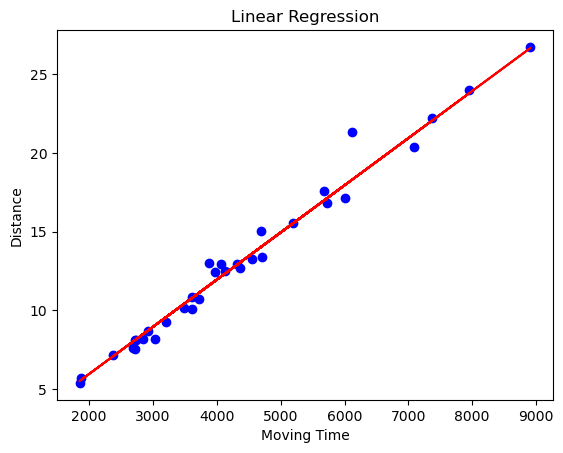

" The relatively lower Mean Squared Error and a higher R-Squared suggest that 'Moving Time' is the best predictor for the distance covered compared to 'Calories' "

In [36]:
# Performing a linear regression on 'Distance' using 'Moving Time' as predictor
# Split data into features (X) and target variable (y)
X = filtered_data[['Moving Time']]
y = filtered_data['Distance']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a linear regression model
model = LinearRegression()

# Fitting the model on the training data
model.fit(X_train, y_train)

# Making predictions on the test data
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

# Plotting the regression line
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.xlabel('Moving Time')
plt.ylabel('Distance')
plt.title('Linear Regression')
plt.show()

''' The relatively lower Mean Squared Error and a higher R-Squared suggest that 'Moving Time' is the best predictor for the distance covered compared to 'Calories' ''' 

Mean Squared Error: 17.30832166313386
R-squared Score: 0.9065077587078986


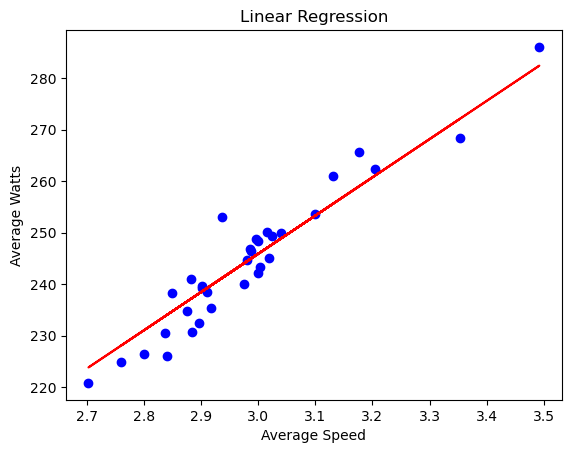

In [37]:
# Performing a linear regression on 'Average Speed' using 'Average Watts' as predictor
# Split data into features (X) and target variable (y)
X = filtered_data[['Average Speed']]
y = filtered_data['Average Watts']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a linear regression model
model = LinearRegression()

# Fitting the model on the training data
model.fit(X_train, y_train)

# Making predictions on the test data
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

# Plotting the regression line
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.xlabel('Average Speed')
plt.ylabel('Average Watts')
plt.title('Linear Regression')
plt.show()

Mean Squared Error: 19263.781694600697
R-squared Score: 0.9938052718199853


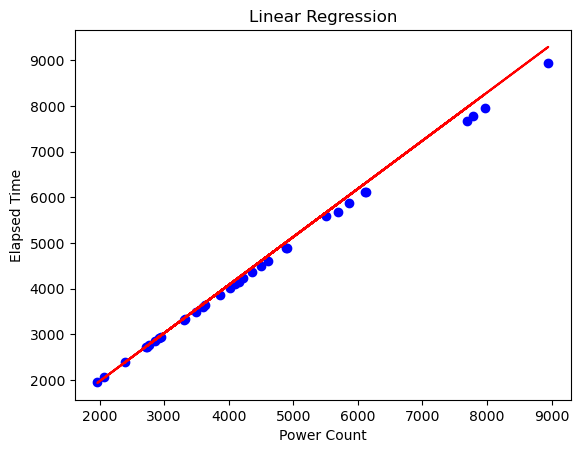

"The model performs exceptionally well in explaining the variability in 'Elapsed Time' based on 'Power Count'/"

In [38]:
# Performing a linear regression on 'Power Count' using 'Elapsed Time' as predictor
# Split data into features (X) and target variable (y)
X = filtered_data[['Power Count']]
y = filtered_data['Elapsed Time']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a linear regression model
model = LinearRegression()

# Fitting the model on the training data
model.fit(X_train, y_train)

# Making predictions on the test data
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

# Plotting the regression line
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.xlabel('Power Count')
plt.ylabel('Elapsed Time')
plt.title('Linear Regression')
plt.show()

'''The model performs exceptionally well in explaining the variability in 'Elapsed Time' based on 'Power Count'/'''

### 2. Random Forest Predictor

Mean Squared Error: 0.7569940369697029
R-squared Score: 0.9734565142060748


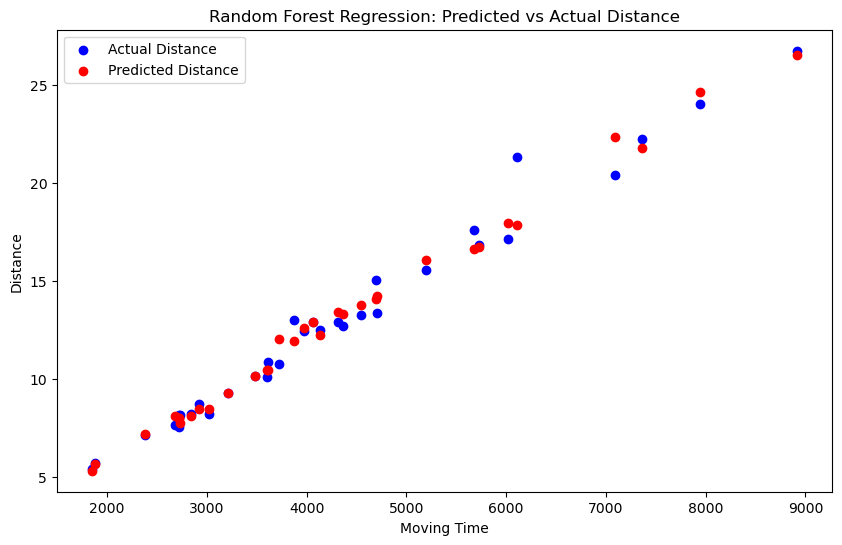

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt

# Performing a Random Forest regression on 'Distance' using 'Moving Time' as predictor
# Split data into features (X) and target variable (y)
# Define features (X) and target variable (y)
X = filtered_data[['Moving Time']]
y = filtered_data['Distance']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

# Plot predicted vs actual distances
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Distance')
plt.scatter(X_test, y_pred, color='red', label='Predicted Distance')
plt.xlabel('Moving Time')
plt.ylabel('Distance')
plt.title('Random Forest Regression: Predicted vs Actual Distance')
plt.legend()
plt.show()


Mean Squared Error: 24.58930410953875
R-squared Score: 0.8671789675650379


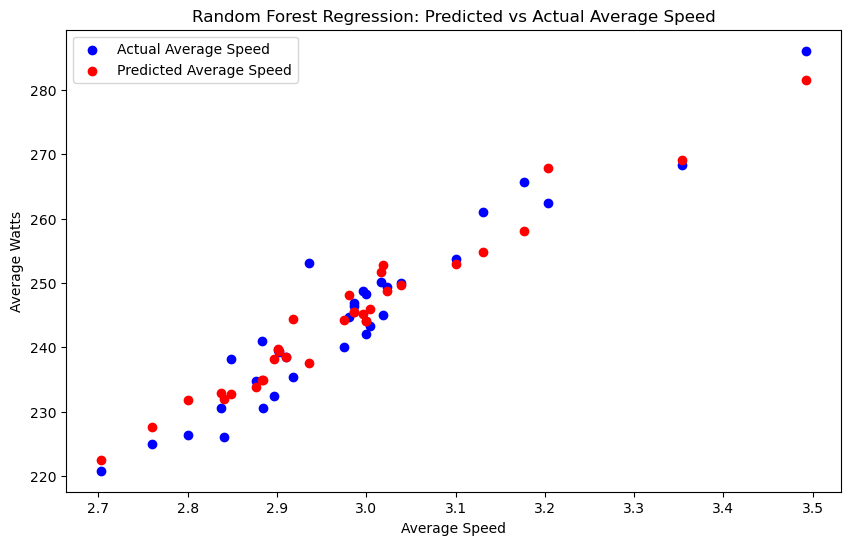

In [40]:
# Performing a Random Forest regression on 'Average Speed' using 'Average Watts' as predictor
# Split data into features (X) and target variable (y)
# Define features (X) and target variable (y)
X = filtered_data[['Average Speed']]
y = filtered_data['Average Watts']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

# Plot predicted vs actual distances
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Average Speed')
plt.scatter(X_test, y_pred, color='red', label='Predicted Average Speed')
plt.xlabel('Average Speed')
plt.ylabel('Average Watts')
plt.title('Random Forest Regression: Predicted vs Actual Average Speed')
plt.legend()
plt.show()

#### The high R-squared score indicates that the model performs well in capturing the relationship between 'Average Watts' and 'Average Speed'. The scatter plot showing a near-perfect match between predicted and actual distances further supports this observation. Overall, these results suggest that 'Moving Time' is a strong predictor of 'Distance' in the dataset.

Mean Squared Error: 23742.421869696984
R-squared Score: 0.992365058317743


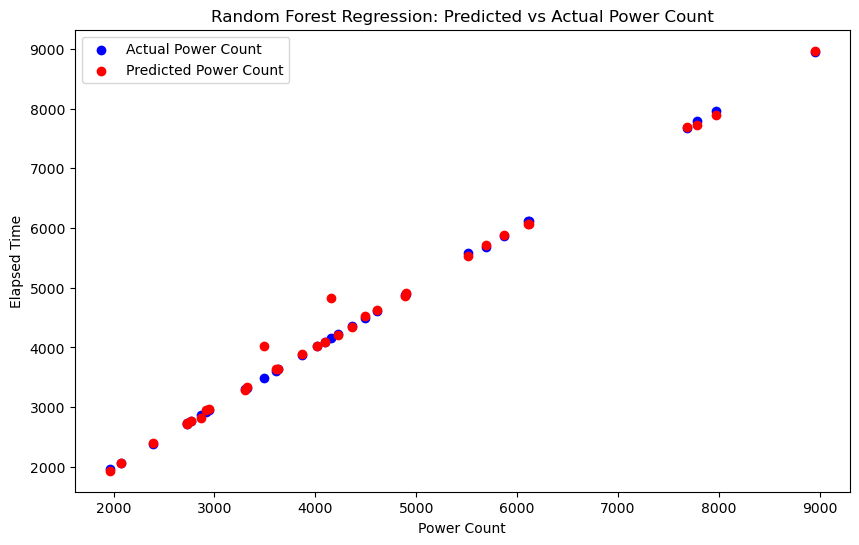

In [41]:
# Performing a Random Forest regression on 'Power Count' using 'Elapsed Time' as predictor
# Split data into features (X) and target variable (y)
# Define features (X) and target variable (y)
X = filtered_data[['Power Count']]
y = filtered_data['Elapsed Time']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

# Plot predicted vs actual distances
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Power Count')
plt.scatter(X_test, y_pred, color='red', label='Predicted Power Count')
plt.xlabel('Power Count')
plt.ylabel('Elapsed Time')
plt.title('Random Forest Regression: Predicted vs Actual Power Count')
plt.legend()
plt.show()

### 3. Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Select features and target variable
X = filtered_data[['Moving Time']]
# Define a threshold to classify distances
threshold = filtered_data['Distance'].mean()  # Example: using mean distance as threshold
y = (filtered_data['Distance'] > threshold).astype(int)  # Binary classification: 1 if distance > threshold, else 0

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit LogisticRegression model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9090909090909091
Confusion Matrix:
[[16  1]
 [ 2 14]]


#### The logistic regression model achieved an accuracy of approximately 90.9% on the test set, indicating that it correctly classified the instances into their respective classes (above or below the mean distance) nearly 91% of the time. The confusion matrix provided additional insights into the model's performance:

- True Positives (TP): 16 instances were correctly classified as above the mean distance.
- False Positives (FP): 1 instance was incorrectly classified as above the mean distance when it was actually below.
- False Negatives (FN): 2 instances were incorrectly classified as below the mean distance when they were actually above.
- True Negatives (TN): 14 instances were correctly classified as below the mean distance.

#### In summary, the logistic regression model demonstrated strong performance in classifying instances based on 'Moving Time' into whether the 'Distance' is above or below the mean distance.

In [43]:
# Select features and target variable
X = filtered_data[['Average Speed']]
# Define a threshold to classify Watts
threshold = filtered_data['Average Watts'].mean()  # Example: using mean Watts as threshold
y = (filtered_data['Average Watts'] > threshold).astype(int)  # Binary classification: 1 if Watts > threshold, else 0

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit LogisticRegression model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8787878787878788
Confusion Matrix:
[[14  3]
 [ 1 15]]


#### The logistic regression model achieved an accuracy of approximately 90.9% on the test set, indicating that it correctly classified the instances into their respective classes (above or below the mean distance) nearly 91% of the time. The confusion matrix provided additional insights into the model's performance:

- True Positives (TP): 14 instances were correctly classified as above the mean Watts.
- False Positives (FP): 1 instance was incorrectly classified as above the mean Watts when it was actually below.
- False Negatives (FN): 3 instances were incorrectly classified as below the mean Watts when they were actually above.
- True Negatives (TN): 15 instances were correctly classified as below the mean Watts.

#### In summary, the logistic regression model demonstrated strong performance in classifying instances based on 'Average Speed' into whether the 'Average Watts' is above or below the mean Watts.